Title: Indidvidual SCZ Genetic Overlap with GWAS
Author: Fallon Ratner
Date: 22-02-2024

## Setting Up

- Load libraries
- Load different dataframes:
  - SCZ GWAS Mapped Genes
  - Differentially Expressed Genes (DEGs) individual SCZ patients from Notaras et al., 2022

In [46]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#select relevant working directory
os.chdir("C:/Users/fallo/OneDrive/Documents/URF_2023/Datasets")


gwas = pd.read_csv("SCZ_GWAS_mapped_genes.txt", sep='\t')
# Set Gene_name column in gwas DataFrame
gwas['Gene_name'] = gwas['symbol']
#skip first row for sawada
sawada_deg = pd.read_csv("sawada_deg_condition.csv", skiprows = 1)

notaras_s1_deg = pd.read_csv("notaras_deg_S1.csv")

notaras_s2_deg = pd.read_csv("notaras_deg_S2.csv")

notaras_s3_deg = pd.read_csv("notaras_deg_S3.csv")

## Visualize Overlap of DEGs from Different SCZ organoid patient lines

- DEGs are based on the author's computational methods
- DEGS for Notaras are computed based for each SCZ line vs all CTRL lines
- Sawada only has one SCZ line and one CTRL line

In [47]:
#Sawada selection criteria: log2FC > 0.585 and FDR < 0.01
#Apply closest criteria to Notaras DEGs
notaras_dfs = [notaras_s1_deg, notaras_s2_deg, notaras_s3_deg]
for notaras_df in notaras_dfs:
    notaras_df['Log2FC'] = np.log2(np.exp(notaras_df['logFC']))


subset_not_s1 = notaras_s1_deg[(notaras_s1_deg['Log2FC'] > 0.585) & (notaras_s1_deg['FDR'] < 0.5)]
subset_not_s2 = notaras_s2_deg[(notaras_s2_deg['Log2FC'] > 0.585) & (notaras_s2_deg['FDR'] < 0.99)]
subset_not_s3 = notaras_s3_deg[(notaras_s3_deg['Log2FC'] > 0.585) & (notaras_s3_deg['FDR'] < 0.5)]


## Visualize gene expression of common genes

In [48]:
#Extract just the genes from each df
s1_genes = set(subset_not_s1['Gene_name'])
s2_genes = set(subset_not_s2['Gene_name'])
s3_genes = set(subset_not_s3['Gene_name'])
sawada_genes = set(sawada_deg['Gene_name'])
gwas_genes = set(gwas['Gene_name'])

# Find common genes among all dataframes
common_genes = s1_genes.intersection(s2_genes, s3_genes, sawada_genes, gwas_genes)

# Extract Log2FC values and gene names for common genes from the Notaras dataframes
notaras_s1_common = subset_not_s1.loc[subset_not_s1['Gene_name'].isin(common_genes), ['Gene_name', 'Log2FC']]
notaras_s2_common = subset_not_s2.loc[subset_not_s2['Gene_name'].isin(common_genes), ['Gene_name', 'Log2FC']]
notaras_s3_common = subset_not_s3.loc[subset_not_s3['Gene_name'].isin(common_genes), ['Gene_name', 'Log2FC']]
# Extract Log2FC values for common genes from the Sawada dataframe
sawada_common = sawada_deg.loc[sawada_deg['Gene_name'].isin(common_genes), ['Gene_name', 'Log2FC']]

In [49]:
# Merge the Log2FC values for common genes from all dataframes into a single DataFrame
heatmap_data = pd.merge(notaras_s1_common, notaras_s2_common, on='Gene_name', how='outer')
# Rename columns
heatmap_data = heatmap_data.rename(columns={'Log2FC_x': 'Notaras_S1', 'Log2FC_y': 'Notaras_S2'})
#merge with 3rd df
heatmap_data = pd.merge(heatmap_data, notaras_s3_common, on='Gene_name', how='outer')
# Rename columns
heatmap_data = heatmap_data.rename(columns={'Log2FC': 'Notaras_S3'})
#merge with 4th df
heatmap_data = pd.merge(heatmap_data, sawada_common, on='Gene_name', how='outer')
# Rename columns
heatmap_data = heatmap_data.rename(columns={'Log2FC': 'Sawada'})

heatmap_data.head()

,Gene_name,Notaras_S1,Notaras_S2,Notaras_S3,Sawada
0,TKT,1.920629,1.259597,1.043776,-0.631158


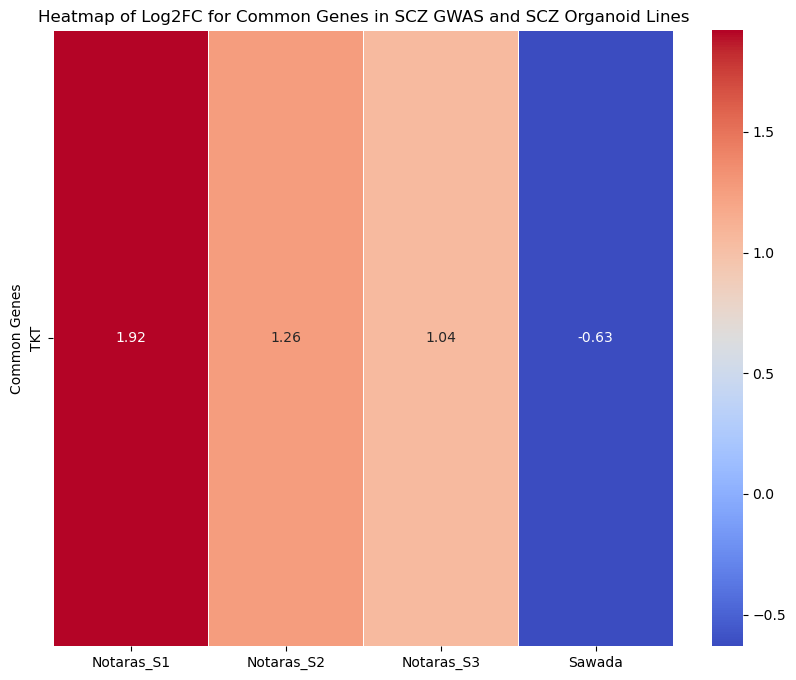

In [50]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.set_index('Gene_name'), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Add labels and title
plt.ylabel('Common Genes')
plt.title('Heatmap of Log2FC for Common Genes in SCZ GWAS and SCZ Organoid Lines')

# Show the plot
plt.show()